<a href="https://colab.research.google.com/github/avnish22/Hospital-Payment-Efficiency-Analysis-Prediction/blob/main/Hospital_Cost_%26_Payment_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏥 Business Problem

**Hospitals and policymakers lack clarity on how healthcare costs and payments vary across treatments (DRGs), providers, and regions.
They need to understand which procedures are the most expensive, where hospitals are over/underpaid, and how Medicare reimbursements compare to total costs — to make cost-control and efficiency decisions.**

# Import libraries & load data

In [ ]:
# Step 1: Import libraies and load data


import numpy as np
import pandas as pd

In [ ]:
# Load Dataset

df = pd.read_csv('/content/inpatientCharges.csv')
df.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71


In [ ]:
# shape of the dataset

df.shape

(163065, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [ ]:
# this data is clean and structured.
# but last 3 columns have to convert into numeric after removing $.

# Data Cleaning

In [ ]:
# Step 2: DATA CLEANING

# remove extraa space
df.columns = df.columns.str.strip()

In [ ]:
# remove $ sign

money_cols = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
df[money_cols] = df[money_cols].replace('[\$,]', '', regex = True).astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3158827228.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[money_cols] = df[money_cols].replace('[\$,]', '', regex = True).astype(float)


In [ ]:
# currency value now numeric, columns are clean, structue and ready for further analysis

**💡 Business Questions

1. Which treatments (DRG definitions) are the most expensive on average?

2. Which states or regions have the highest healthcare costs?

3. How do charges vs payments differ across hospitals?

4. Is there any relationship between covered charges, total payments, and Medicare payments?**

# Step 3: EDA

**a) Summary stats for financial terms**

In [ ]:
# Step 3: Exploratory Data Analysis

# a) Summary stats for financial terms

df[money_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Average Covered Charges,163065.0,36133.954224,35065.365931,2459.4,15947.16,25245.82,43232.59,929118.90
Average Total Payments,163065.0,9707.473804,7664.642598,2673.0,5234.50,7214.10,11286.40,156158.18
Average Medicare Payments,163065.0,8494.490964,7309.467261,1148.9,4192.35,6158.46,10056.88,154620.81


In [ ]:
# Hospital bills are about 3-4 times more than what they get.
# This indicates huge cost variation between hospitals or procedures.

**b) Top 10 most expensive DRG's (treatments) by (average covered charge)**

In [ ]:
# b) Top 10 most expensive DRG's (treatments) by (average covered charge)

top_drg = df[['DRG Definition','Average Covered Charges']].groupby(by='DRG Definition').mean().sort_values(by='Average Covered Charges',ascending=False).reset_index().head(10)
top_drg

,DRG Definition,Average Covered Charges
0,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,163227.331725
1,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,143428.051066
2,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,139186.350937
3,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,135330.939966
4,246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,96348.806707
5,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,95568.276246
6,238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,85010.449213
7,252 - OTHER VASCULAR PROCEDURES W MCC,83502.956898
8,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,81704.226749
9,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,75339.614435


In [ ]:
# these are the top 10 costly treatrments across hospitals.
# helps hospitals and insurers priortizes cost_control measures for expensive DRGs.

***C) Average charges by states***

In [ ]:
# b) Average charges by states

state_costs = df.groupby('Provider State')[money_cols].mean().sort_values(by = 'Average Covered Charges', ascending=False).reset_index()
state_costs.head(10)

,Provider State,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,CA,67508.616536,12629.668472,11494.381678
1,NJ,66125.686274,10678.988647,9586.940056
2,NV,61047.115416,10291.718028,8747.602829
3,FL,46016.233587,8826.990436,7667.478695
4,TX,41480.193404,9243.979573,7970.430797
5,AZ,41200.063020,10154.528211,8825.717240
6,CO,41095.136111,9502.685550,8150.931392
7,AK,40348.743333,14572.391732,12958.969437
8,DC,40116.663658,12998.029416,11811.967706
9,PA,39633.959763,9100.043218,7919.184856


In [ ]:
# these are the state have highest amount of hospital charges.
# Helps Medicare or state governments analyze geographic inequalities in healthcare spending.

In [ ]:
# higher the hospital charges -> higher they will recieve
# Medicare and total payments almost move hand-in-hand (0.99 correlation)

**d) variation across Hospitals**

In [ ]:
# Variation in average charges by hospital

provider_cost = df[['Provider Name', 'Average Covered Charges']].groupby('Provider Name').mean().sort_values(by = 'Average Covered Charges', ascending = False).reset_index().head(10)
provider_cost

,Provider Name,Average Covered Charges
0,UVA HEALTH SCIENCES CENTER,211922.000000
1,BAYONNE HOSPITAL CENTER,147441.334000
2,DOCTORS MEDICAL CENTER,144695.833286
3,STANFORD HOSPITAL,138818.649770
4,NORTHBAY MEDICAL CENTER,138504.546230
5,CROZER CHESTER MEDICAL CENTER,137130.847732
6,WASHINGTON HOSPITAL,131510.122375
7,SETON MEDICAL CENTER,130177.362615
8,TEMPLE UNIVERSITY HOSPITAL,126824.325139
9,REGIONAL MEDICAL CENTER OF SAN JOSE,126288.693562


In [ ]:
# these are top hospitals by cost, possible due to reputation, treatment type, or region.
# Some hospitals consistently show higher-than-average charges
# Helpful for both patients (cost transparency) and insurers (negotiation).
# The relationship between Medicare and total payments can guide policy reimbursement strategies.

# Step 4: Feature Engineering


**a) Create key derived metrics**

In [ ]:
# new business metrics

df['Payment Gap'] = df['Average Covered Charges'] - df['Average Total Payments']
df['Medicare coverage ratio'] = df['Average Medicare Payments'] / df['Average Total Payments']
df['Payment Efficiency'] = df['Average Total Payments'] / df['Average Covered Charges']

In [ ]:
# Payment gap: tells how much hospital charges vs how much they recieve.
# Medicare coverage ratio: Show what pct of total payment Medicare covers.
# Payment efficiency: Indicates how efficiently hospitals are reimbersed -- closer to 1 = efficient.

**b. Analyze overcharging pattern**

In [ ]:
# average payment gap by state

gap_state = df[['Provider State', 'Payment Gap']].groupby(by = 'Provider State').mean().reset_index().sort_values(by = 'Payment Gap', ascending = False).head(10)
gap_state

,Provider State,Payment Gap
31,NJ,55446.697627
4,CA,54878.948063
33,NV,50755.397388
9,FL,37189.243151
43,TX,32236.213831
5,CO,31592.450561
3,AZ,31045.534809
38,PA,30533.916545
7,DC,27118.634242
40,SC,26730.073804


In [ ]:
# these are the top 10 states having largest payment gap.
# Useful for cost control policy and regional payment audits.

**c. Efficiency Ranking by Hospital**

In [ ]:
efficiency_rank = df[['Provider Name', 'Payment Efficiency']].groupby(by = 'Provider Name').mean().sort_values(by = 'Payment Efficiency', ascending = False).reset_index().head(10)

In [ ]:
efficiency_rank

,Provider Name,Payment Efficiency
0,GUADALUPE COUNTY HOSPITAL,2.497131
1,SHARKEY ISSAQUENA COMMUNITY HOSPITAL,1.724964
2,KEEFE MEMORIAL HOSPITAL,1.463936
3,KNOX COUNTY HOSPITAL,1.431602
4,KILMICHAEL HOSPITAL,1.375169
5,LINCOLN MEDICAL & MENTAL HEALTH CENTER,1.372120
6,YUKON KUSKOKWIM DELTA REG HOSPITAL,1.346832
7,SHEEHAN MEMORIAL HOSPITAL,1.307201
8,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,1.286449
9,WELCH COMMUNITY HOSPITAL,1.279217


In [ ]:
# Identify most financially efficient hospitals.

**d. Top underpaid Treatments**

In [ ]:
# DRGs with largest average payment gap

underpaid_drg = df[['DRG Definition', 'Payment Gap']].groupby(by = 'DRG Definition').mean().sort_values(by = 'Payment Gap', ascending = False).reset_index().head(10)
underpaid_drg

,DRG Definition,Payment Gap
0,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,118967.846262
1,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,104839.130069
2,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,98870.389506
3,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,97565.345671
4,246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,73022.467688
5,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,67789.605128
6,238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,63061.904108
7,252 - OTHER VASCULAR PROCEDURES W MCC,60657.317585
8,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,59172.965236
9,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,54355.247783


In [ ]:
# Summary of Business Insights:
#-> Hospitals in some states charge significantly more than they recieve---inefficient payment systems.
#-> Payment efficieny and Medicare coverage ratio provide quick health of hospital finacials.
#-> Certain DRGs (e.g. cardiac or orthopedic surgeries) show systematic underpayment trends.

# Hypothesis Test
**Hypothesis 1 - Statw wise pricing differnce**



In [ ]:
# Null hypothesis (H₀): Geographic factors don’t influence cost.

# Alternative hypothesis (H₁): Geographic factors do influence cost.

In [ ]:
import scipy.stats as stats

# anova-test
anova_result = stats.f_oneway(*[group["Average Covered Charges"].values for name, group in df.groupby("Provider State")])

print("F-statistic: ", anova_result.statistic)
print("p-value: ", anova_result.pvalue)

F-statistic:  535.5562125814947
p-value:  0.0


In [ ]:
# INSIGHTS:

# p < 0.05, we reject H.(null huypothesis) ~ Meaning, charges differ significantly by state.
# Pricing is not standardized (consistent), geographic factors strongly influence cost.

**Hypothesis 2: Payment vs covered charged gap**

In [ ]:
# H₀: Mean of Average Covered Charges = Mean of Average Medicare Payments.

# H₁: Means are different.

In [ ]:
# run paired t-test

t_stat, p_value = stats.ttest_rel(df["Average Covered Charges"], df["Average Medicare Payments"])

print("T-statistic: ", t_stat)
print("p-value: ", p_value)

T-statistic:  374.36706434431363
p-value:  0.0


In [ ]:
# p < 0.05, so we reject H₀, that mean hospital are charging significantly more than what they're reimbursed.
# confirm pricing inefficieny or insurance gap.

**Hypothesis 3 — Relationship between Discharges & Payments**

In [ ]:
# pearson corelation test

corr, p_val = stats.pearsonr(df["Total Discharges"], df["Average Total Payments"])

print("Correlation coefficient: ", corr)
print("p-value: ", p_val)

Correlation coefficient:  -0.016020104570689423
p-value:  9.833213753747535e-11


In [ ]:
# As total discharges increase, average total payments very slightly decrease — but almost negligibly.
# we reject the null — meaning there is a statistically significant correlation.

# The relationship between hospital discharge count and average payment is statistically detectable,
# but not meaningful in business terms



```
# This is formatted as code
```

# Predictive Modeling - Regression

In [ ]:
# GOAL: Predict the Average Total Payments hospitals recieve, based on treatment type,
# discharges, region and covered charges.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# encode categorical variable

le = LabelEncoder()
df_model = df.copy()

df_model['DRG Code'] = le.fit_transform(df_model['DRG Definition'])
df_model['Provider State code'] = le.fit_transform(df_model['Provider State'])

In [ ]:
# select features and target

X = df_model[["Total Discharges", "Average Covered Charges", "DRG Code", "Provider State code"]]
y = df_model["Average Total Payments"]

In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(130452, 4) (32613, 4)


## Baseline Linear Regression

In [ ]:
# train model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction

y_pred = lr.predict(X_test)

In [ ]:
# evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23358983.558916006
R-squared: 0.5988990964602041


In [ ]:
# R² = 0.59 → model captures ~60% of real-world variance → decent but improvable.

# MSE ≈ 23M → large in absolute terms, but fine since payments are in thousands.

# Model Improvement — Regularization

In [ ]:
# Goal → reduce overfitting and improve predictive accuracy beyond baseline linear regression.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

model = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

result = []

for name, model in model.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  result.append([name, mse, r2])

results_df = pd.DataFrame(result, columns=['Model', 'MSE', 'R2'])
print(results_df)

        Model           MSE        R2
0       Ridge  2.335898e+07  0.598899
1       Lasso  2.335898e+07  0.598899
2  ElasticNet  2.335899e+07  0.598899


In [ ]:
## Insights:
# 1. All models perform almost identically.
# 2. Regularization did'nt improve accuracy whih means
# model is not overfitting (good). Data has no styrong
# multicollinearity.
# Ridge, lasso, ElasticNet are mainly useful when:
# - you have many correlated or noisy features.
# - you want to reduce model complexity or improve gener-
# alization.

# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(N_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost R2:", r2_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "N_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost MSE: 6467636.095185332
XGBoost R2: 0.8889431693377235


In [ ]:
# MSE is 6,467,636 - meaning the model is far more accurate in estimating
# hospital payments.

# R-Squared - (89%), The model explains about 89% of the variation in
# the target variable - excellent fit, showing strong predictive power.

# Feature Imortance

In [ ]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False
               )

                   Feature  Importance
1  Average Covered Charges    0.609035
2                 DRG Code    0.311424
3      Provider State code    0.072656
0         Total Discharges    0.006885


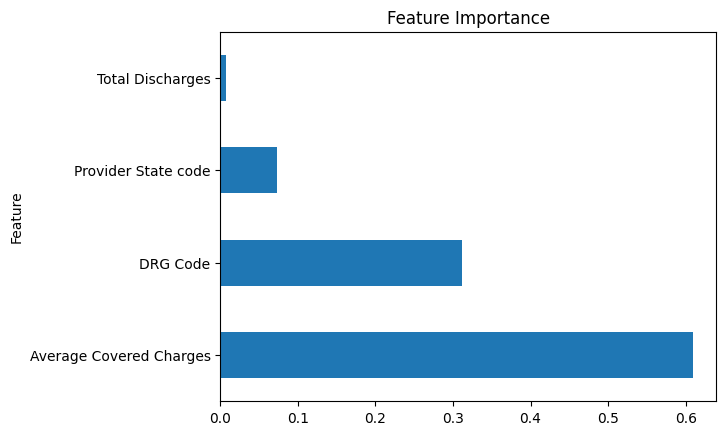

In [ ]:
import matplotlib.pyplot as plt

print(importance)
importance.plot(kind="barh", x = "Feature", y = "Importance", legend=False)
plt.title("Feature Importance")
plt.show()

In [ ]:
y_pred_xgb

array([ 7340.5586, 15697.867 ,  5443.1655, ...,  4224.4116,  7956.743 ,
       12492.758 ], dtype=float32)

In [ ]:
from google.colab import files
df.to_excel('my_data.xlsx', index = False)
files.download('my_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>